In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [2]:
df1 = pd.read_csv('data/hood1/uv_meter.csv', header = None )
df2 = pd.read_csv('data/hood1/uv_meter_13_inches.csv', header = None )
df3 = pd.read_csv('data/hood1/uv_meter_19_inches.csv', header = None )

In [3]:
# heights of BSC in inches
hgt = 26.5

## y-coordinate of masks on floor
dist = 21/4 *np.array([1,2,3])

## estimated fistance from bulb by y coordinate and height
bsc_h=(1/0.393701)*(dist**2+hgt**2)**.5
bsc_h13=(1/0.393701)*(dist**2+(hgt-13)**2)**.5
bsc_h19=(1/0.393701)*(dist**2+(hgt-19)**2)**.5

In [4]:
##stratify data by 'column'
y1 = np.concatenate((df1.iloc[:,0].values,df2.iloc[:,0].values,df3.iloc[:,0].values))
y2 = np.concatenate((df1.iloc[:,1].values,df2.iloc[:,1].values,df3.iloc[:,1].values))
y3 = np.concatenate((df1.iloc[:,2].values,df2.iloc[:,2].values,df3.iloc[:,2].values))
x = np.concatenate((bsc_h,bsc_h13,bsc_h19))

In [5]:
#intens = 100 #uW/cm^2
#bsc_h = 67.31 #cm
lowdose = 60 *10**3 #uJ/cm^2
highdose = 1 *10**6 #uJ/cm^2

In [6]:
#inverse square fit
params = np.array([.1,20])

def funcinv(x,a,b):
    return  1 /  (a / (x-b)**2)

reslow1 = curve_fit(funcinv, x, lowdose/y1, params)
reslow2 = curve_fit(funcinv, x, lowdose/y2, params)
reslow3 = curve_fit(funcinv, x, lowdose/y3, params)
reshigh1 = curve_fit(funcinv, x, highdose/y1, params)
reshigh2 = curve_fit(funcinv, x, highdose/y2, params)
reshigh3 = curve_fit(funcinv, x, highdose/y3, params)

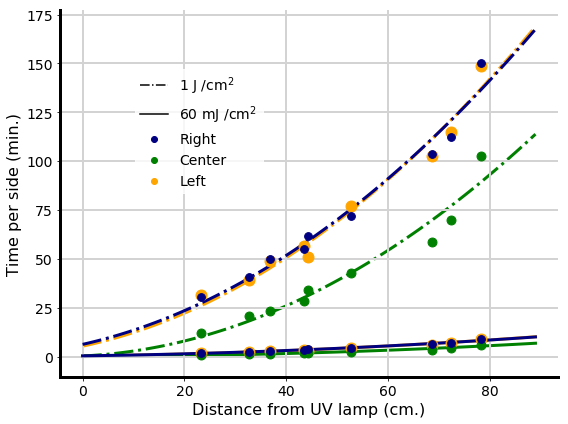

In [8]:
fig,ax = plt.subplots(figsize=(8,6))
colors = ['Navy','Green','Orange']
for col, curve1,curve2,zord in zip(colors,[reslow1[0],reslow2[0],reslow3[0]],[reshigh1[0],reshigh2[0],reshigh3[0]],[2,1,0]):
    ax.plot(np.arange(90),funcinv(np.arange(90),*curve1)/60,color=col,linestyle= '-',lw=3,zorder=zord)
    ax.plot(np.arange(90),funcinv(np.arange(90),*curve2)/60,color=col,linestyle= '-.',lw=3,zorder=zord)
    
    
    #ax.plot( np.arange(90),lowdose / ( (df3.values.flatten()[i]*bsc_h19[i]**2) / (np.arange(90) )**2 )/ 60 )
#ax.plot((bsc_h - hts ),lowdose / ( (intens*bsc_h**2) / (bsc_h - hts )**2 )/ 60 , color = 'purple', lw=6,label = '60 mJ / cm$^2$')
#ax.plot((bsc_h - hts ),highdose / ( (intens*bsc_h**2) / (bsc_h - hts )**2 ) / 60,color = 'navy',lw=6,label = '1 J / cm$^2$')

ax.grid(color='lightgrey', linestyle='-', linewidth=2)
for y,col,zord,size in zip([y1,y2,y3],colors,[5,4,3],[3,4,6]):
    ax.scatter(x,lowdose/y/60,color=col,s=size*20,zorder =zord)
    ax.scatter(x,highdose/y/60,color=col,s=size*20,zorder=zord)


ax.set_ylabel('Time per side (min.)',fontsize=16)
ax.set_xlabel('Distance from UV lamp (cm.)',fontsize=16)


#ax.set_xticks(np.arange(0,40,5)/0.393701)
#ax.set_xticklabels(np.arange(0,40,5))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.tick_params(labelsize=14)



#ax.legend(edgecolor= 'w')
plt.tight_layout()
h = [plt.plot([],[], color='k',ls=sty)[0] for sty in ["-.","-"]] +[plt.scatter([],[],color=col) for col in colors]

plt.legend(handles=h, labels=['1 J /cm$^{2}$','60 mJ /cm$^{2}$','Right','Center','Left'],
           loc=(.15,0.5),edgecolor='w',fontsize=14)
plt.savefig('figs/time_distance_bsc.pdf')

In [464]:
h

In [278]:
import numpy as np
from scipy.optimize import curve_fit

#x = np.asarray(range(20,401,20))
#y1 = np.random.rand(20)
params = np.array([1000,100])

def funcinv(x, a):
    return a/x**2

res = curve_fit(funcinv, x, y1, params)
res1 = curve_fit(funcinv, x, y2, params)
res2 = curve_fit(funcinv, x, y3, params)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


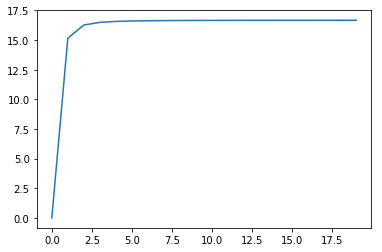

In [295]:
plt.plot(50 / (3+.3/np.arange(20)**2))

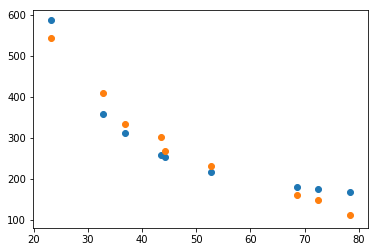

In [280]:
plt.scatter(x, funcinv(x,res[0][0],res[0][1]))
plt.scatter(x,y1)

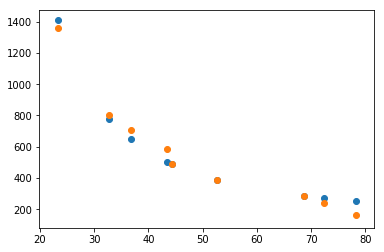

In [281]:
plt.scatter(x, funcinv(x,res1[0][0],res1[0][1]))
plt.scatter(x,y2)

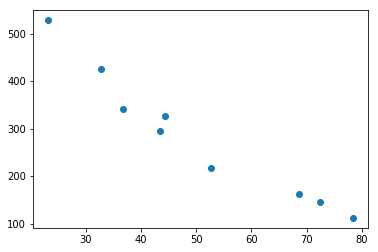

In [283]:
#plt.scatter(x, funcinv(x,res2[0][0],res2[0][1]))
plt.scatter(x,y3)

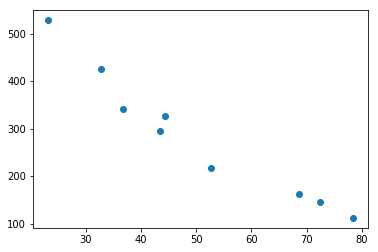

In [266]:
plt.scatter(x,y3)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


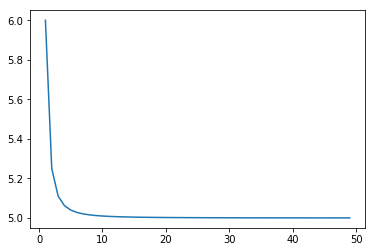

In [277]:
plt.plot(np.arange(50),5+1/(np.arange(50))**2)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


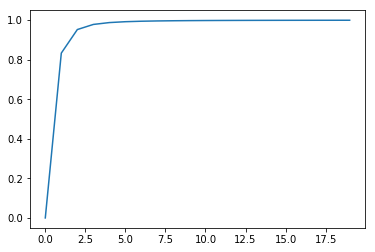

In [305]:
plt.plot(1/(1+ .2/(np.arange(20))**2))